### Assignment 4 ###

In [1]:
import pandas as pd
import numpy as numpy

import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import researchpy as rp
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [2]:
#Q#1 
student_data = {'Student': ['1', '2', '3', '4'],
        'Internship': [1,2,1,0], 'Job Offer':[4,6,3,1]}

In [3]:
student_df=pd.DataFrame(student_data)

In [4]:
student_df=student_df.set_index('Student')


In [5]:
student_df

,Internship,Job Offer
Student,,
1,1,4
2,2,6
3,1,3
4,0,1


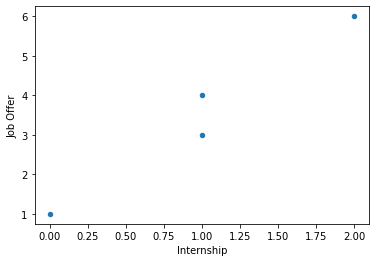

In [6]:
student_df.plot.scatter(x='Internship', y='Job Offer', figsize=(6, 4))

plt.show()

In [7]:
internship_mean=student_df['Internship'].mean()
joboffer_mean=student_df['Job Offer'].mean()
print(internship_mean)
print(joboffer_mean)

1.0
3.5


In [8]:
student_df['JobOffer_Cov']=(student_df['Job Offer']-joboffer_mean)*(student_df['Internship']-internship_mean)

In [9]:
student_df['Internship_var']=(student_df['Internship']-internship_mean)**2

In [10]:
student_df

,Internship,Job Offer,JobOffer_Cov,Internship_var
Student,,,,
1,1,4,0.0,0.0
2,2,6,2.5,1.0
3,1,3,-0.0,0.0
4,0,1,2.5,1.0


In [11]:
beta=student_df['JobOffer_Cov'].sum()/student_df['Internship_var'].sum()
print(f'beta = {beta}')

beta = 2.5


In [12]:
alfa= joboffer_mean-(beta*internship_mean)
print(f'alfa = {alfa}')

alfa = 1.0


In [13]:
y_pred=alfa+beta*student_df['Internship']

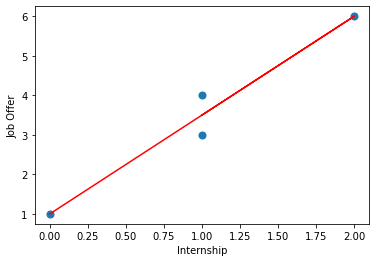

In [14]:
student_df.plot(x='Internship', y='Job Offer', 
                     kind='scatter', s=50, figsize=(6, 4))

plt.plot(student_df['Internship'], y_pred, color='red')

plt.show()

In [15]:
#Q1 a ) Independent varable X = Internship
#2 b) The Slope (beta )= 2.5

### Q2: Score received on an exam measured in "percentage points" (Y) is regressed on “percentage attendance” (X) for 22 students in the course Statistics for Data Science. ###
### If the Y intercept, b0 = 39.39 and the slope, b1 = 0.341, which of the following statement is correct?###

### c) If attendance increases by 1%, the estimated average score received will increase by 0.341 percentage points ###

### Question3 ###
$$ \mu_{salary growth} = 178 $$
$$ \mu_{eduspend} = 47.8 $$
$$ \sigma_{salary growth} = 63.15 $$
$$ \sigma_{eduspend} = 22.8 $$
$$ r_{xy} = 0.43 $$


$$\hat{\beta}=r_{xy}.\frac{\sigma_{salary growth}}{\sigma_{eduspend}}= 1.19 $$

### Question 4 ###
We have to run T test on $$\beta$$

$$ t=\frac{\beta-0}{SE_{\beta}}$$

In [16]:
# using the above 
beta_constant =24.033/0.409
print(f'Beta_constant :{beta_constant}')

Beta_constant :58.76039119804402


In [17]:
beta_crim=-0.9460*0.44
print(f'beta_crim: {beta_crim}')

beta_crim: -0.41624


In [18]:
# We can not find standardized Coefficients - constant not available 
# for CRIM we nned sd Y and X,

### Question 5 ###

In [19]:
stats.t.cdf(x=-9.460,df=504,)

5.856131164121652e-20

In [20]:
# Price = beta-0 + beta-1* CRIM

#H0:beta_1<=-0.3
#H1:beta_1>-0.3

#alpha =0.05 left tail test

In [21]:
p_value=stats.t.sf(x=abs(-9.460),df=504)
p_value

5.856131164121652e-20

In [22]:
# so we can reject the #H0:beta_1<=-0.3 and beta_crim will range 

beta_crim=[-0.416-1.96*0.044,-0.41624+1.96*0.0444 ]

In [23]:
beta_crim

[-0.50224, -0.329216]

In [24]:
# so this evicences for unit change in the price will drop b 30,000 atleast

### Question 6 ###

In [25]:
truck_maint_df=pd.read_excel('MLR_TruckMaintenance.xlsx')
truck_maint_df=truck_maint_df.set_index('Truck')

In [26]:
truck_maint_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23 entries, 1 to 23
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Maintenance Expense  23 non-null     float64
 1   Miles Driven         23 non-null     int64  
 2   Age of Truck         23 non-null     int64  
dtypes: float64(1), int64(2)
memory usage: 736.0 bytes


In [27]:
truck_maint_df.sample()

,Maintenance Expense,Miles Driven,Age of Truck
Truck,,,
1,908.56,10500,10


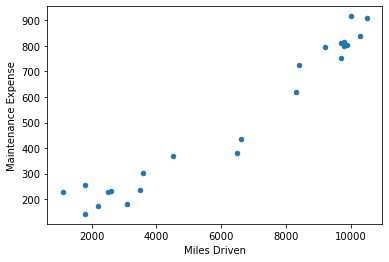

In [28]:
# a)MLR Miles Driven Maintenance expense, Let us see relationship

truck_maint_df.plot.scatter(x='Miles Driven', y='Maintenance Expense', figsize=(6, 4))

plt.show()


In [29]:
slope, intercept, r_value, _, _ ,= stats.linregress(truck_maint_df['Miles Driven'],truck_maint_df['Maintenance Expense'])

In [30]:
print(f'slope: {slope}')

slope: 0.08006110339077266


In [31]:
print(f'Intercept: {intercept}')

Intercept: 13.224155086158987


In [32]:
# Equation of the MLR : Maitenence cost = 12.22{Intercept} + slope{0.08006}*Miles Driven

In [33]:
#Q6- B ) both the independent and dependent variables are highly corelataed 
print('R-square value', r_value**2)

R-square value 0.9479112090743634


Text(0.5, 1.0, 'Miles Driven vs Maintenance Exp')

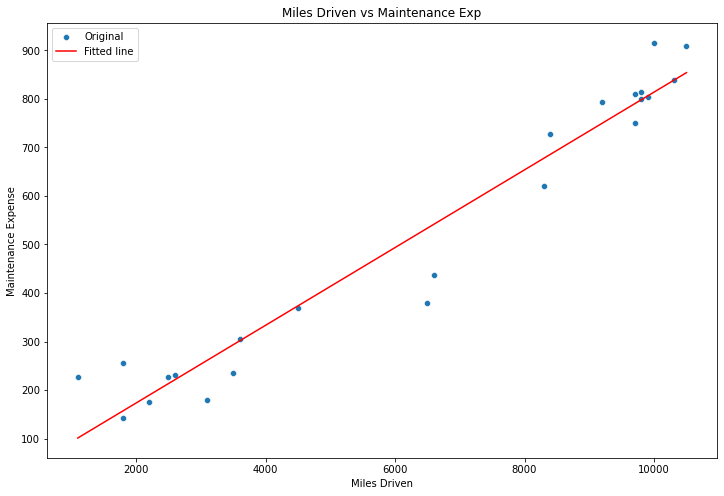

In [34]:
plt.figure(figsize=(12, 8))

sns.scatterplot(x='Miles Driven', y='Maintenance Expense', data=truck_maint_df, label='Original')

sns.lineplot(x=truck_maint_df['Miles Driven'], y=(slope * truck_maint_df['Miles Driven'] + intercept), 
             color='r', label='Fitted line')

plt.title('Miles Driven vs Maintenance Exp')

### Question 7 ###


In [35]:
factory_overhead_df=pd.read_csv('MLR_FactoryOverhead.csv')
factory_overhead_df=factory_overhead_df.set_index(['Month'])

In [36]:
factory_overhead_df.sample(10)


,Machine Hours,Production Runs,Overhead Cost
Month,,,
2,1284,29,87804
29,1585,32,98498
33,1678,41,117183
24,1420,42,105752
5,1500,35,106968
6,1777,30,107925
1,1539,31,99798
20,1794,29,110530
30,1493,33,101803


In [37]:
factory_overhead_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36 entries, 1 to 36
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Machine Hours    36 non-null     int64
 1   Production Runs  36 non-null     int64
 2   Overhead Cost    36 non-null     int64
dtypes: int64(3)
memory usage: 1.1 KB


Text(0.5, 1.0, 'Machine Hours vs Overhead Cost')

<Figure size 864x576 with 0 Axes>

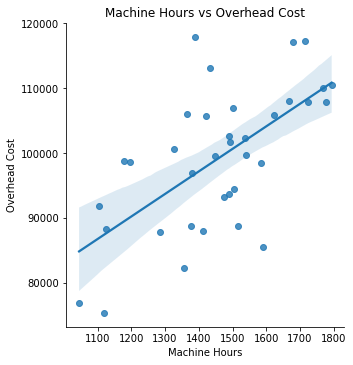

In [38]:
plt.figure(figsize=(12, 8))

sns.lmplot(x='Machine Hours', y='Overhead Cost', data=factory_overhead_df)

plt.title('Machine Hours vs Overhead Cost')

Text(0.5, 1.0, 'Machine Hours vs Overhead Cost')

<Figure size 864x576 with 0 Axes>

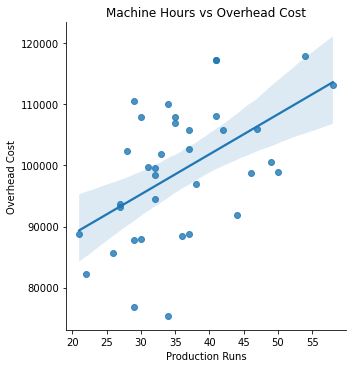

In [39]:
plt.figure(figsize=(12, 8))

sns.lmplot(x='Production Runs', y='Overhead Cost', data=factory_overhead_df)

plt.title('Machine Hours vs Overhead Cost')

<AxesSubplot:>

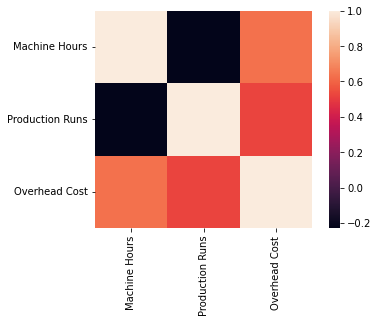

In [40]:
sns.heatmap(data=factory_overhead_df.corr(),square=True)

In [41]:
X = factory_overhead_df.drop(['Overhead Cost'], axis=1)
X=sm.add_constant(X)

y = factory_overhead_df['Overhead Cost']

In [42]:
X.head()

,const,Machine Hours,Production Runs
Month,,,
1,1.0,1539,31
2,1.0,1284,29
3,1.0,1490,27
4,1.0,1355,22
5,1.0,1500,35


In [43]:
reg_model = sm.OLS(y, X).fit()

reg_model.params

const              3996.678209
Machine Hours        43.536398
Production Runs     883.617925
dtype: float64

In [44]:
reg_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          Overhead Cost   R-squared:                       0.866
Model:                            OLS   Adj. R-squared:                  0.858
Method:                 Least Squares   F-statistic:                     107.0
Date:                Mon, 29 Aug 2022   Prob (F-statistic):           3.75e-15
Time:                        12:56:25   Log-Likelihood:                -349.07
No. Observations:                  36   AIC:                             704.1
Df Residuals:                      33   BIC:                             708.9
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const            3996.6782   6603.651      0.605      0.549   -9438.551    1.74e+04
Machine Hours      43.5364      3.589     12.129      0.000      36.234      50.839
Production Runs   883.6179     82.251     10.743      0.000     716.276    1050.960
==============================================================================
Omnibus:                        3.142   Durbin-Watson:                   1.313
Prob(Omnibus):                  0.208   Jarque-Bera (JB):                2.259
Skew:                          -0.609   Prob(JB):                        0.323
Kurtosis:                       3.155   Cond. No.                     1.42e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.42e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [45]:
slope_mh, intercept_mh, r_value_mh, _, _ ,= stats.linregress(factory_overhead_df['Machine Hours'],factory_overhead_df['Overhead Cost'])

In [46]:
print(f'slope_mh:{slope_mh}')
print(f'Intercept_mh:{intercept_mh}')
print(f'R2_mh:{r_value_mh**2}')

slope_mh:34.7022364208012
Intercept_mh:48621.35463393337
R2_mh:0.3992780530435396


In [47]:
slope_pr, intercept_pr, r_value_pr, _, _ ,= stats.linregress(factory_overhead_df['Production Runs'],factory_overhead_df['Overhead Cost'])

In [48]:
print(f'slope_pr:{slope_pr}')
print(f'Intercept_pr:{intercept_pr}')
print(f'R2_pr:{r_value_pr**2}')

slope_pr:655.0706601982704
Intercept_pr:75605.5157139844
R2_pr:0.2709655638064029


In [49]:
# R sq for Machine hours are higher than Production runs


In [50]:
sd_overheadcost=factory_overhead_df['Overhead Cost'].std()
sd_productionruns=factory_overhead_df['Production Runs'].std()
sd_machinehours=factory_overhead_df['Machine Hours'].std()

In [51]:
# let us find the standardized beta for  Production Runs and Machine hours respectively 

print(f'beta_std_machinehours:{slope_mh*(sd_machinehours/sd_overheadcost)}')
print(f'beta_std_productionruns:{slope_pr*(sd_productionruns/sd_overheadcost)}')

beta_std_machinehours:0.6318845250863006
beta_std_productionruns:0.520543527292774


In [52]:
# Machine Runs are better predictor for overhead cost.